# Explicit conjunction: adding conjunction between direct objects

Generating sentences of the form

- 1) **c has traveled to X and Y, c didn't travel to X** (contradiction)
- 1) **c went to X and Y, c didn't go to X** (contradiction)
- 1) **c has visited X and Y, c didn't visit X** (contradiction)


- 2) **c has traveled to X and Y, c didn't travel to Y** (contradiction)
- 2) **c went to X and Y, c didn't go to Y** (contradiction)
- 2) **c has visited X and Y, c didn't visit Y** (contradiction)


- 3) **c has traveled to X and Y, c didn't travel to W ** (non-contradiction)
- 3) **c went to X and Y, c didn't go to W** (non-contradiction)
- 3) **c has visited X and Y, c didn't visit W** (non-contradiction)


- 4) **c has traveled to X and Y, d didn't travel to X (Y)** (non-contradiction)
- 4) **c went to X and Y, d didn't go to X (Y)** (non-contradiction)
- 4) **c has visited X and Y, d didn't visit X (Y)** (non-contradiction)

In [1]:
import numpy as np
import pandas as pd
from word_lists import name_list, city_list
import os
import inspect
import sys
import itertools

almost_current = os.path.abspath(inspect.getfile(inspect.currentframe()))
currentdir = os.path.dirname(almost_current)
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from plots.functions import plot_histogram_from_labels # noqa

% matplotlib inline

### Generating atoms

In [2]:
template1 = itertools.product(name_list, city_list)
template1 = list(template1)
upper_bound = 11000/4

### Generating all types of sentences

- 1) **c has traveled to X and Y, c didn't travel to X** (contradiction)
- 1) **c went to X and Y, c didn't go to X** (contradiction)
- 1) **c has visited X and Y, c didn't visit X** (contradiction)

In [3]:
np.random.shuffle(template1)
all_sentences_1 = []
for i in range(int(upper_bound)):
    person, place1 = template1[i]
    place2 = place1
    while place2 == place1:
        new_i = np.random.choice(len(template1))
        _, place2 = template1[new_i]
    if i%3 == 0:
        sentence = "{} has traveled to {} and {},{} didn't travel to {}".format(person, place1, place2, person, place1)
    elif i%3 ==1:
        sentence = "{} went to {} and {},{} didn't go to {}".format(person, place1, place2, person, place1)
    else:
        sentence = "{} has visited {} and {},{} didn't visit {}".format(person, place1, place2, person, place1)
    all_sentences_1.append(sentence)

    
all_sentences_1 = [sentence.split(",") + [1] for sentence in all_sentences_1]

for sentence in all_sentences_1[0:10]:
    print(sentence)


['Poe has traveled to Vaslui and Giurgiu', "Poe didn't travel to Vaslui", 1]
['Wesley went to Arad and Hunedoara', "Wesley didn't go to Arad", 1]
['Birch has visited Bucharest and Lugoj', "Birch didn't visit Bucharest", 1]
['Coby has traveled to Slatina and Giurgiu', "Coby didn't travel to Slatina", 1]
['Plummer went to Tulcea and Slatina', "Plummer didn't go to Tulcea", 1]
['Hunter has visited Turda and Reghin', "Hunter didn't visit Turda", 1]
['Stanley has traveled to Dej and Deva', "Stanley didn't travel to Dej", 1]
['Windsor went to Tulcea and Vaslui', "Windsor didn't go to Tulcea", 1]
['Sutter has visited Slobozia and Deva', "Sutter didn't visit Slobozia", 1]
['Birtle has traveled to Reghin and Vaslui', "Birtle didn't travel to Reghin", 1]


- 2) **c has traveled to X and Y, c didn't travel to Y** (contradiction)
- 2) **c went to X and Y, c didn't go to Y** (contradiction)
- 2) **c has visited X and Y, c didn't visit Y** (contradiction)

In [4]:
np.random.shuffle(template1)
all_sentences_2 = []
for i in range(int(upper_bound)):
    person, place1 = template1[i]
    place2 = place1
    while place2 == place1:
        new_i = np.random.choice(len(template1))
        _, place2 = template1[new_i]
    if i%3 == 0:
        sentence = "{} has traveled to {} and {},{} didn't travel to {}".format(person, place1, place2, person, place2)
    elif i%3 ==1:
        sentence = "{} went to {} and {},{} didn't go to {}".format(person, place1, place2, person, place2)
    else:
        sentence = "{} has visited {} and {},{} didn't visit {}".format(person, place1, place2, person, place2)
    all_sentences_2.append(sentence)

    
all_sentences_2 = [sentence.split(",") + [1] for sentence in all_sentences_2]

for sentence in all_sentences_2[0:10]:
    print(sentence)


['Edric has traveled to Craiova and Bucharest', "Edric didn't travel to Bucharest", 1]
['Lathan went to Deva and Oradea', "Lathan didn't go to Oradea", 1]
['Fulton has visited Arad and Slobozia', "Fulton didn't visit Slobozia", 1]
['Carlisle has traveled to Dej and Bucharest', "Carlisle didn't travel to Bucharest", 1]
['Sisley went to Reghin and Oradea', "Sisley didn't go to Oradea", 1]
['Byrd has visited Lugoj and Oradea', "Byrd didn't visit Oradea", 1]
['Mick has traveled to Hunedoara and Bucharest', "Mick didn't travel to Bucharest", 1]
['Kipp went to Slatina and Oradea', "Kipp didn't go to Oradea", 1]
['Cheever has visited Deva and Vaslui', "Cheever didn't visit Vaslui", 1]
['Winsome has traveled to Reghin and Giurgiu', "Winsome didn't travel to Giurgiu", 1]


- 3) **c has traveled to X and Y, c didn't travel to W ** (non-contradiction)
- 3) **c went to X and Y, c didn't go to W** (non-contradiction)
- 3) **c has visited X and Y, c didn't visit W** (non-contradiction)

In [5]:
np.random.shuffle(template1)
all_sentences_3 = []
for i in range(int(upper_bound)):
    person, place1 = template1[i]
    place2 = place1
    while place2 == place1:
        new_i = np.random.choice(len(template1))
        _, place2 = template1[new_i]
    place3 = place1
    while place3 == place1 or place3 == place2:
        new_i = np.random.choice(len(template1))
        _, place3 = template1[new_i]
    if i%3 == 0:
        sentence = "{} has traveled to {} and {},{} didn't travel to {}".format(person, place1, place2, person, place3)
    elif i%3 ==1:
        sentence = "{} went to {} and {},{} didn't go to {}".format(person, place1, place2, person, place3)
    else:
        sentence = "{} has visited {} and {},{} didn't visit {}".format(person, place1, place2, person, place3)
    all_sentences_3.append(sentence)

    
all_sentences_3 = [sentence.split(",") + [0] for sentence in all_sentences_3]

for sentence in all_sentences_3[0:10]:
    print(sentence)


['Fitzwilliam has traveled to Turda and Reghin', "Fitzwilliam didn't travel to Baia Mare", 0]
['Barlow went to Deva and Hunedoara', "Barlow didn't go to Dej", 0]
['Tennyson has visited Baia Mare and Deva', "Tennyson didn't visit Oradea", 0]
['Sennett has traveled to Mangalia and Cluj-Napoca', "Sennett didn't travel to Vaslui", 0]
['Cody went to Mangalia and Giurgiu', "Cody didn't go to Tulcea", 0]
['Lawson has visited Slobozia and Arad', "Lawson didn't visit Slatina", 0]
['Reeve has traveled to Giurgiu and Oradea', "Reeve didn't travel to Timisoara", 0]
['Irwin went to Slobozia and Giurgiu', "Irwin didn't go to Slatina", 0]
['Osmond has visited Dej and Bucharest', "Osmond didn't visit Giurgiu", 0]
['Everly has traveled to Oradea and Reghin', "Everly didn't travel to Craiova", 0]


- 4) **c has traveled to X and Y, d didn't travel to X (Y)** (non-contradiction)
- 4) **c went to X and Y, d didn't go to X (Y)** (non-contradiction)
- 4) **c has visited X and Y, d didn't visit X (Y)** (non-contradiction)

In [6]:
np.random.shuffle(template1)
all_sentences_4 = []
for i in range(int(upper_bound)):
    person1, place1 = template1[i]
    place2 = place1
    person2 = person1
    while place2 == place1 and person2 == person1:
        new_i = np.random.choice(len(template1))
        person2, place2 = template1[new_i]
    if i%2 ==0:
        place3 = place1
    else:
        place3 = place2
    if i%3 == 0:
        sentence = "{} has traveled to {} and {},{} didn't travel to {}".format(person1, place1, place2, person2, place3)
    elif i%3 == 1:
        sentence = "{} went to {} and {},{} didn't go to {}".format(person1, place1, place2, person2, place3)
    else:
        sentence = "{} has visited {} and {},{} didn't visit {}".format(person1, place1, place2, person2, place3)
    all_sentences_4.append(sentence)

    
all_sentences_4 = [sentence.split(",") + [0] for sentence in all_sentences_4]

for sentence in all_sentences_4[0:10]:
    print(sentence)


['Darwin has traveled to Slatina and Oradea', "Birkett didn't travel to Slatina", 0]
['Andrea went to Timisoara and Giurgiu', "Halsey didn't go to Giurgiu", 0]
['Madeline has visited Reghin and Tulcea', "Lea didn't visit Reghin", 0]
['Timber has traveled to Turda and Oradea', "Joan didn't travel to Oradea", 0]
['Lilly went to Blaj and Craiova', "Wainwright didn't go to Blaj", 0]
['Baron has visited Vaslui and Slobozia', "Radcliff didn't visit Slobozia", 0]
['Pierce has traveled to Slobozia and Baia Mare', "Edison didn't travel to Slobozia", 0]
['Ransom went to Hunedoara and Craiova', "Padget didn't go to Craiova", 0]
['Cody has visited Cluj-Napoca and Cluj-Napoca', "Elmer didn't visit Cluj-Napoca", 0]
['Petunia has traveled to Hunedoara and Oradea', "Clem didn't travel to Oradea", 0]


In [7]:
np.random.shuffle(all_sentences_1)
np.random.shuffle(all_sentences_2)
np.random.shuffle(all_sentences_3)
np.random.shuffle(all_sentences_4)



size1 = len(all_sentences_1)
size2 = len(all_sentences_2)
size3 = len(all_sentences_3)
size4 = len(all_sentences_4)

all_sentences = all_sentences_1 + all_sentences_2 + all_sentences_3 + all_sentences_4
size = len(all_sentences)

print("type 1 size = {}".format(size1))
print("type 2 size = {}".format(size2))
print("type 3 size = {}".format(size3))
print("type 4 size = {}".format(size4))
print("total size = {}".format(size))

type 1 size = 2750
type 2 size = 2750
type 3 size = 2750
type 4 size = 2750
total size = 11000


### Generating a train DataFrame with 10000 examples and a test DataFrame with 1000 examples 

In [8]:
sentence_1 = [triple[0] for triple in all_sentences]
sentence_2 = [triple[1] for triple in all_sentences]
label = [triple[2] for triple in all_sentences]

df_dict = {"sentence1": sentence_1,
           "sentence2": sentence_2,
           "label": label}
        
df = pd.DataFrame(df_dict)
df = df[["sentence1", "sentence2", "label"]]
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:10000]
df_test = df.iloc[10000:]

df.tail()    

,sentence1,sentence2,label
10995,Pell has traveled to Reghin and Bucharest,Dane didn't travel to Bucharest,0
10996,Hobbes has visited Baia Mare and Craiova,Hobbes didn't visit Giurgiu,0
10997,Sly has visited Dej and Tulcea,Sly didn't visit Reghin,0
10998,Breeze has traveled to Deva and Tulcea,Breeze didn't travel to Deva,1
10999,Willard went to Bucharest and Hunedoara,Everard didn't go to Bucharest,0


#### Looking at the label distribution

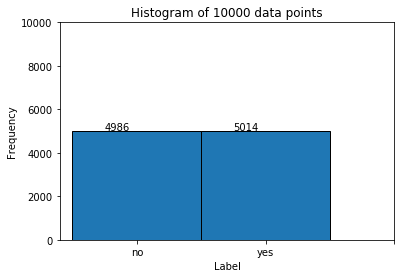

In [9]:
train_label = df_train["label"].values
plot_histogram_from_labels(train_label, ["no", "yes"], "b2_a_ii_train.png")

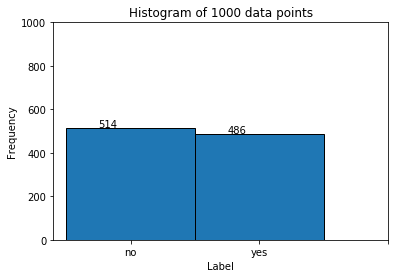

In [10]:
test_label = df_test["label"].values
plot_histogram_from_labels(test_label, ["no", "yes"], "b2_a_ii_test.png")

### Saving to CSV

In [11]:
df_train.to_csv("b2_a_ii_train.csv", index=False)
df_test.to_csv("b2_a_ii_test.csv", index=False)